In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

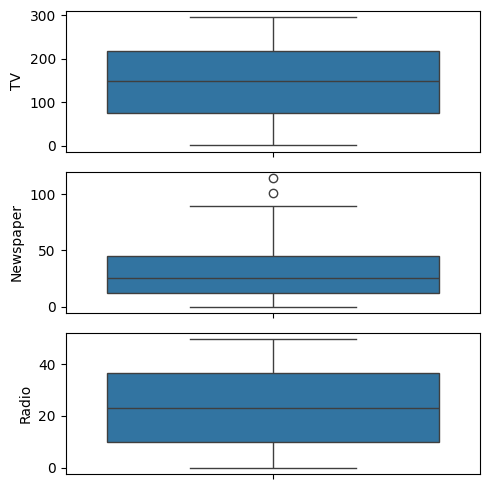

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

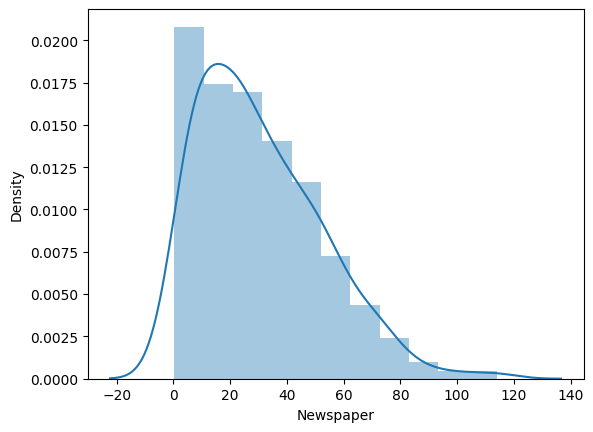

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()


In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: ylabel='Newspaper'>

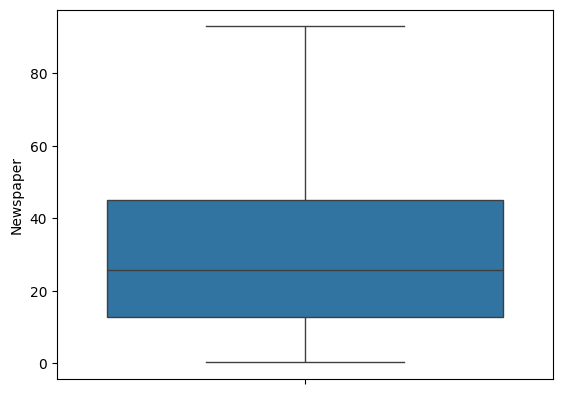

In [ ]:
sns.boxplot(data['Newspaper'])

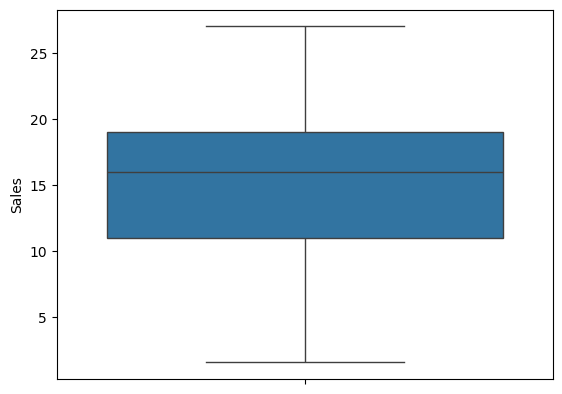

In [ ]:
sns.boxplot(data['Sales']);

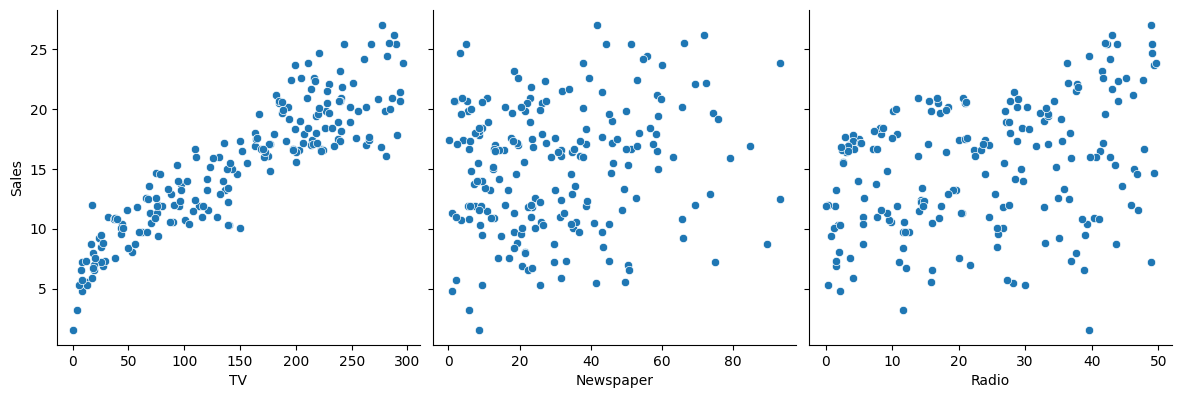

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

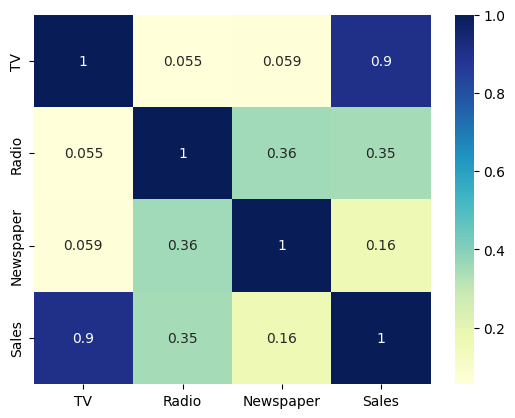

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)

In [ ]:
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[18.76 21.36 12.82 12.82 20.08 19.38 19.68  7.92 19.16 21.36 19.02 10.04
 20.36 12.24 22.    6.84 12.72 12.82 20.54  9.84  5.42 14.32 19.34 10.5
 18.52 16.46 18.7  11.52 21.9  20.28 19.48 10.94 11.28 13.76 11.94 12.68
 21.36 19.4  18.94  6.84 12.74 19.16 13.02 12.34 14.46 19.   18.22 11.28
 17.92 11.28 12.34 20.78 12.24 13.34  5.42 20.28 19.64 18.9   9.94 17.74
 10.02 13.02  7.92  4.68 20.38 11.92 20.54 18.52 19.4  10.24 17.92 20.28
 11.92 12.08  9.12  8.28 20.28 13.34  6.84 12.16 21.8  19.76 12.34 19.34
 19.92 21.36 19.4   7.04 14.46 18.7  12.16  9.94  9.94 20.18 19.3  19.68
  9.7  21.8  13.34  8.28 17.26 13.44  7.92 19.4  20.36  8.28 19.02 19.34
 17.92  4.68 13.02 17.92 10.5  21.8  16.96 14.64 12.24 13.56 14.76  9.94
 19.4  16.46 17.88 10.5  12.58 19.34 12.34 12.96 19.4  11.94 21.9  19.76
  5.42 13.56] [20.08 10.5  11.84 19.34 12.72 19.76  4.68 11.52  8.28 21.36 17.48  8.28
 21.28  9.7  22.   18.28 18.56  5.96 13.44 18.9  11.84 21.36 18.28 11.94
 19.68 12.58 21.8  20.08  8.28  5.42 1

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
import pandas as pd

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = pd.concat([Results, pd.DataFrame({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance}, index=[0])], ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8243172327588384
RMSE: 2.3468638002597633


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.868363,0.824317,2.346864,0.044046


In [ ]:
svr = SVR().fit(X_train,y_train)
svr


SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[18.95754526 18.30653221 12.03978591 11.98937699 18.94775521 18.93656116
 18.91619378  8.49853824 18.72625807 18.90686832 18.97803146 10.43200652
 18.56763183 14.734715   18.6205227   8.54973717 12.70045502 14.63217104
 17.57737078 10.08819776  8.27227962 14.524363   19.00021752  9.78253555
 18.67789283 16.88732445 18.81180984 11.0052078  19.0036813  18.9915469
 17.36284716 10.96361358 11.48158845 13.88957525 13.04157871 11.9203728
 18.49197025 18.45937584 17.98606682  8.57468679 12.79007791 18.74206035
 12.44581741 14.85121178 14.4615363  18.40154331 18.86315063 11.48158845
 16.45781781 11.47673782 14.78635042 19.00997953 14.71541257 12.29511439
  8.27031126 18.99246563 18.53579769 18.77573541  9.50954702 17.15153262
  9.99349538 12.45957029  8.49853824  8.17017135 19.00982382 13.41968291
 17.57737078 18.66229328 18.45641621 10.50334048 16.38714464 18.99107857
 13.35652487 13.19676629  8.95778244  8.82253428 18.99246563 12.30878401
  8.55326087 11.33460936 18.76590732 17.72485961 11.4

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
# Use pd.concat to concatenate DataFrames
Results = pd.concat([Results,pd.DataFrame({"Model":"Support Vector Machine","Train R2":[r2_train],"Test R2":[r2],"Test RMSE":[rmse],"Variance":[variance]})],ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.7723660468783331
RMSE: 2.6714178565743874


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.868363,0.824317,2.346864,0.044046
1,Support Vector Machine,0.779473,0.772366,2.671418,0.007107


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    7.013569
x1       0.055292
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     536.5
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.44e-48
Time:                        09:57:01   Log-Likelihood:                -299.69
No. Observations:                 134   AIC:                             603.4
Df Residuals:                     132   BIC:                             609.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0136      0.398     17.637      0.0

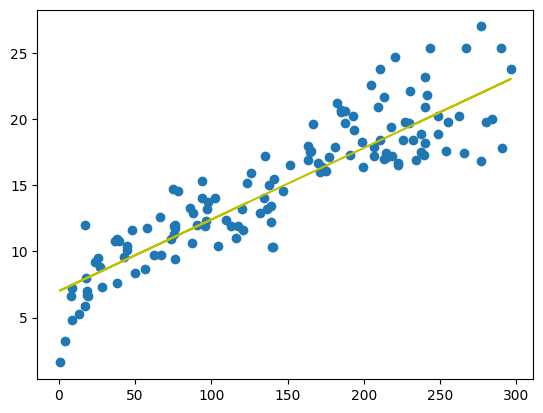

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

165   -3.079641
101    0.397758
88     1.004111
125   -1.235068
54    -1.338887
         ...   
114    3.262564
111    1.422253
154    3.202515
126   -0.844850
123    1.379934
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([19.97964112, 23.40224186, 11.89588945, 11.83506779, 21.53888733,
       19.84693931, 19.73635447,  7.96459846, 19.05072848, 21.77111549,
       20.13998913, 10.1210028 , 18.66921078, 14.72686131, 22.73320358,
        8.04753708, 12.69210028, 14.63839344, 17.23713713,  9.7781898 ,
        7.49461289, 14.54439632, 21.0467848 ,  9.4740815 , 18.92355591,
       16.55151113, 19.31060285, 10.71263168, 20.46068516, 20.27822018,
       17.01043821, 10.66839775, 11.23790966, 13.96382592, 13.08467646,
       11.75212916, 23.03178265, 18.45357035, 17.72371042,  8.08624178,
       12.79715588, 19.09496241, 12.38799198, 14.82638766, 14.4891039 ,
       18.34851475, 19.49859707, 11.23790966, 16.16999344, 11.23238042,
       14.77109524, 20.74820574, 14.71027358, 12.205527  ,  7.48908365,
       20.28927866, 18.60285988, 19.19448877,  9.1976194 , 16.80032702,
        9.68419269, 12.40457971,  7.96459846,  7.05227354, 20.77032271,
       13.49384036, 17.23713713, 18.88485122, 18.44804111, 10.19

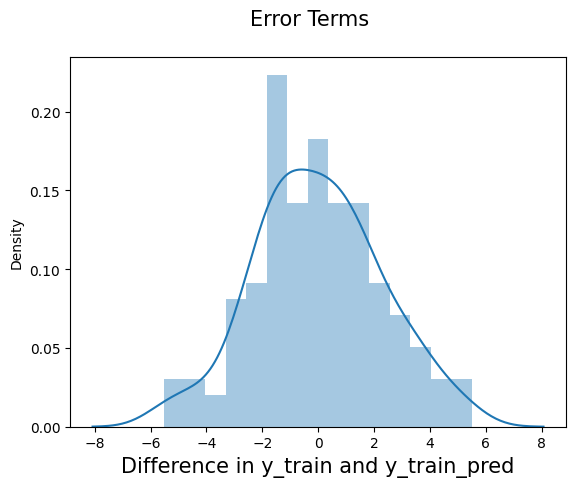

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

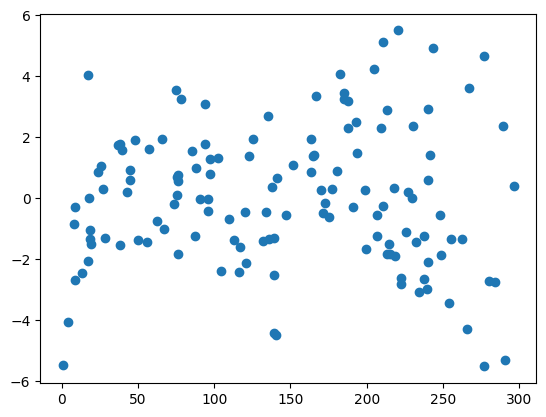

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([21.54994582, 10.30899702, 10.82874576, 18.011231  , 12.56492772,
       17.4306606 ,  7.31214791, 10.79557031,  8.40140857, 23.20871839,
       16.32481222,  8.53411037, 22.14710394,  9.39667211, 22.8272007 ,
       17.93935085, 19.0009653 ,  7.66049015, 15.29084398, 19.20554725,
       10.91721363, 23.24742308, 17.93935085, 13.08467646, 19.63682812,
       13.67630534, 22.57285557, 21.67711838,  8.39587932,  7.41720351,
       16.80032702, 15.29637322,  7.94801073, 15.67236167, 16.72844688,
       14.91485553,  9.97171327, 18.29875158, 19.39907072, 19.08943317,
       14.16840787,  7.74342878, 13.13443964, 18.97884833, 18.21028371,
       22.53415088, 18.06099417, 12.95197465, 17.81770753, 10.76239486,
       11.44802086, 20.18422307, 22.69449889, 11.97329884, 22.91566857,
       19.16684256,  7.47802517,  8.75528005,  8.09730026, 21.46147795,
       19.62024039, 10.83980425, 20.24504473, 20.88643679, 14.26240499,
       11.16602952])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.3232999593284576

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8278274305048385

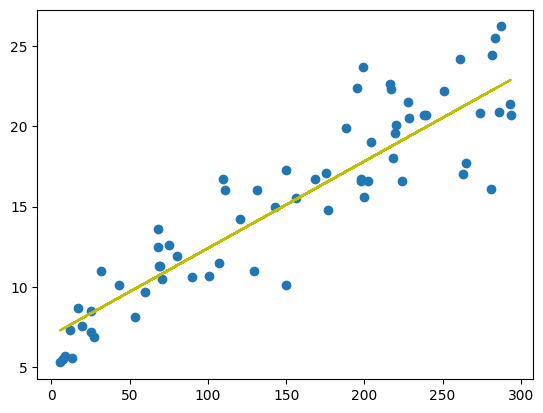

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()